# Reconocimiento Facial

In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60) # Se demora 200MB de imagenes

In [4]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [5]:
print(faces.images.shape)

(1348, 62, 47)


In [6]:
import matplotlib.pyplot as plt

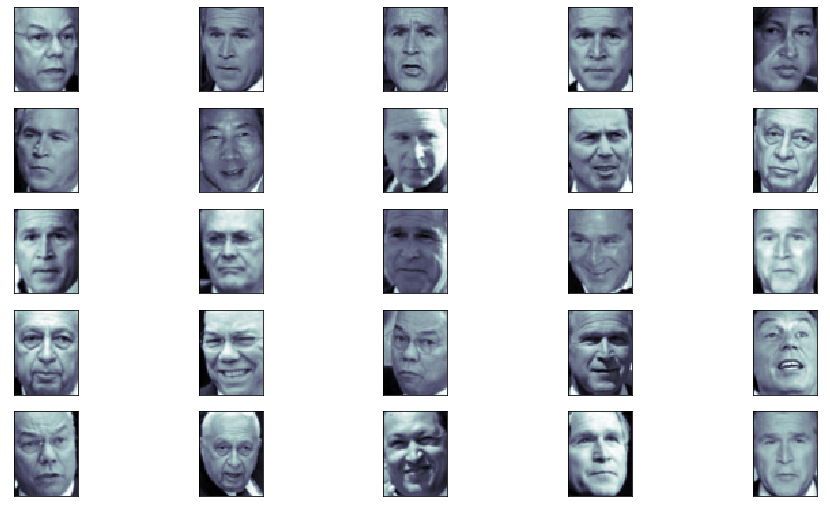

In [10]:
fig,ax = plt.subplots(5,5,figsize = (16,9))
for i,ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i],cmap= 'bone')
    ax_i.set(xticks=[],yticks = [], xlabel = faces.target_names[faces.target[i]])
    ax_i.xaxis.label.set_color('white')

In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [13]:
pca = RandomizedPCA(n_components=150, whiten = True, random_state=42)
svc = SVC(kernel='rbf',class_weight='balanced')
model = make_pipeline(pca,svc) #Hace primero PCA y luego el svc

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target,random_state=42)

In [16]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {
    'svc__C':[0.1,1,5,10,50],
    "svc__gamma":[0.0001,0.0005,0.001,0.05,0.01]
}
grid = GridSearchCV(model,param_grid)
%time grid.fit(Xtrain,Ytrain)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 51.1 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
  

In [21]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [22]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imagenes(incorrectas en rojo)')

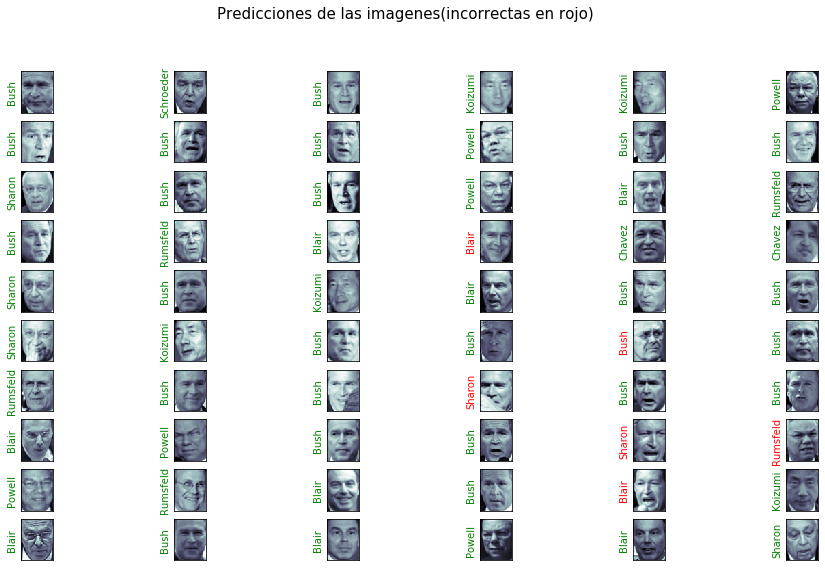

In [27]:
fig,ax = plt.subplots(10,6,figsize = (16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47),cmap = 'bone')
    ax_i.set(xticks=[],yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = 'green' if yfit[i]== Ytest[i] else 'red')
    
fig.suptitle('Predicciones de las imagenes(incorrectas en rojo)',size = 15)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(Ytest, yfit,target_names=faces.target_names)) # Reporte de resultados

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
mat = confusion_matrix(Ytest,yfit)

In [34]:
import seaborn as sns; sns.set()

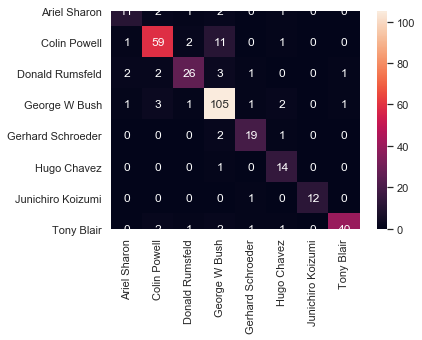

In [35]:
sns.heatmap(mat.T,square=True, annot=True,fmt='d',cbar=True, xticklabels=faces.target_names, yticklabels=faces.target_names)